<a href="https://colab.research.google.com/github/Yahia0mohamed/ML_projects/blob/main/CNN_MNIST_Fashion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **CNN for Fashion MNIST**
*this project focses on building a CNN model to predict which clothes items is it.*

---


1.   [Import used libraries in the project](https://colab.research.google.com/drive/1D_d8bDc-P3vPDEsV2K3w3JhJCHzIXzz1#scrollTo=-zHrmrmnsVz6&line=1&uniqifier=1)
2.   [Data visualization and preprocessing](https://colab.research.google.com/drive/1D_d8bDc-P3vPDEsV2K3w3JhJCHzIXzz1#scrollTo=iaIZrwEBspP6&line=1&uniqifier=1)





# **Importing libraries**

In [101]:
import tensorflow as tf
import keras
from keras import layers
from keras.datasets import fashion_mnist
from keras import backend as k
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split

# **Data visualization and preprocessing**

In [102]:
BATCH_SIZE = 128
NUM_CLASSES= 10
EPOCHS=12
IMG_ROWS, IMG_COLS=28,28

(x_main,y_main),(x_test,y_test)=fashion_mnist.load_data()
x_train, x_val, y_train, y_val = train_test_split(x_main, y_main, test_size=0.2, random_state=42)

In [103]:
#setting the data shapes
x_train = x_train.reshape(x_train.shape[0], IMG_ROWS, IMG_COLS, 1)
x_val = x_val.reshape(x_val.shape[0], IMG_ROWS, IMG_COLS, 1)
x_test = x_test.reshape(x_test.shape[0], IMG_ROWS, IMG_COLS, 1)

# Normalize the photo pixels
x_train = x_train / 255.0
x_val = x_val / 255.0
x_test = x_test / 255.0

print(f"x_train shape is {x_train.shape} and x_test shape is {x_test.shape}")



x_train shape is (48000, 28, 28, 1) and x_test shape is (10000, 28, 28, 1)


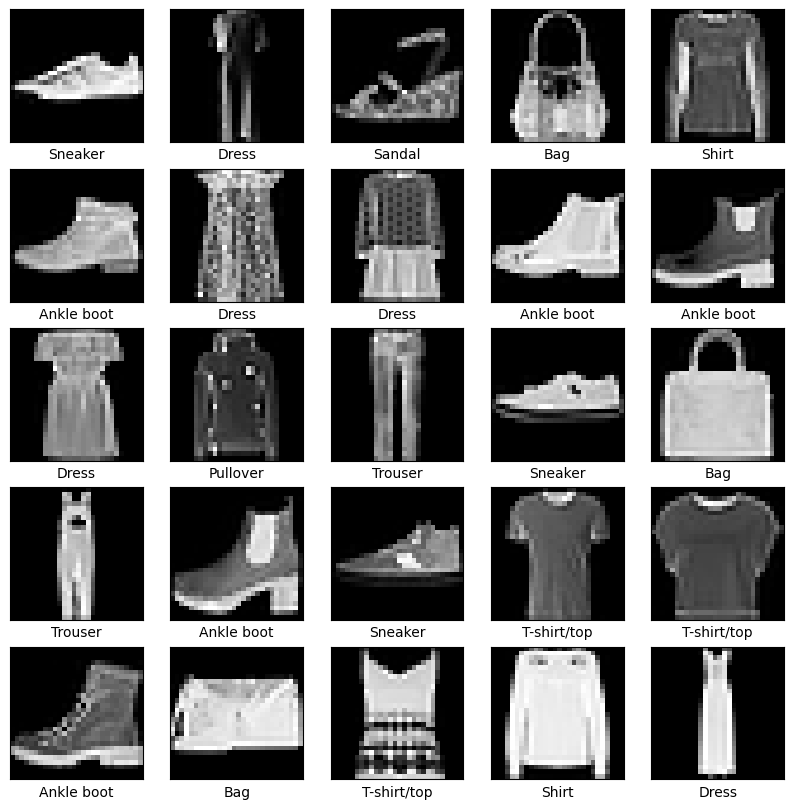

In [104]:
#showing a sample from the images
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

def print_sample():
    plt.figure(figsize=(10,10))
    for i in range(25):
        plt.subplot(5,5,i+1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(x_train[i].reshape(IMG_ROWS,IMG_COLS), cmap=plt.cm.gray)
        plt.xlabel(class_names[y_train[i]])
    plt.show()
print_sample()

#to perform binary classification on the classes
y_train = keras.utils.to_categorical(y_train, NUM_CLASSES)
y_val = keras.utils.to_categorical(y_val, NUM_CLASSES)
y_test = keras.utils.to_categorical(y_test, NUM_CLASSES)

# **The first archeticture uses adam optimizer and 12 epochs**

In [105]:
#creating the 4 models with 4 architectures
#Sequential CNN model.
# first architecture

Model1 = tf.keras.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
Model1.compile(optimizer='adam',
               loss='categorical_crossentropy',  # Changed to 'categorical_crossentropy'
               metrics=['accuracy'])
Model1.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_18 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_14 (Ba  (None, 27, 27, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_14 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_19 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 batch_normalization_15 (Ba  (None, 10, 10, 64)        256       
 tchNormalization)                                               
                                                     

In [106]:
history = Model1.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/12
375/375 [==============================] - 5s 8ms/step - loss: 0.5295 - accuracy: 0.8167 - val_loss: 0.9634 - val_accuracy: 0.6216
Epoch 2/12
375/375 [==============================] - 3s 7ms/step - loss: 0.3533 - accuracy: 0.8745 - val_loss: 0.3124 - val_accuracy: 0.8898
Epoch 3/12
375/375 [==============================] - 2s 6ms/step - loss: 0.3063 - accuracy: 0.8913 - val_loss: 0.3925 - val_accuracy: 0.8559
Epoch 4/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2754 - accuracy: 0.9005 - val_loss: 0.2653 - val_accuracy: 0.9046
Epoch 5/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2571 - accuracy: 0.9082 - val_loss: 0.2720 - val_accuracy: 0.9010
Epoch 6/12
375/375 [==============================] - 3s 7ms/step - loss: 0.2420 - accuracy: 0.9117 - val_loss: 0.2818 - val_accuracy: 0.8996
Epoch 7/12
375/375 [==============================] - 2s 6ms/step - loss: 0.2328 - accuracy: 0.9153 - val_loss: 0.2827 - val_accuracy: 0.9003
Epoch 

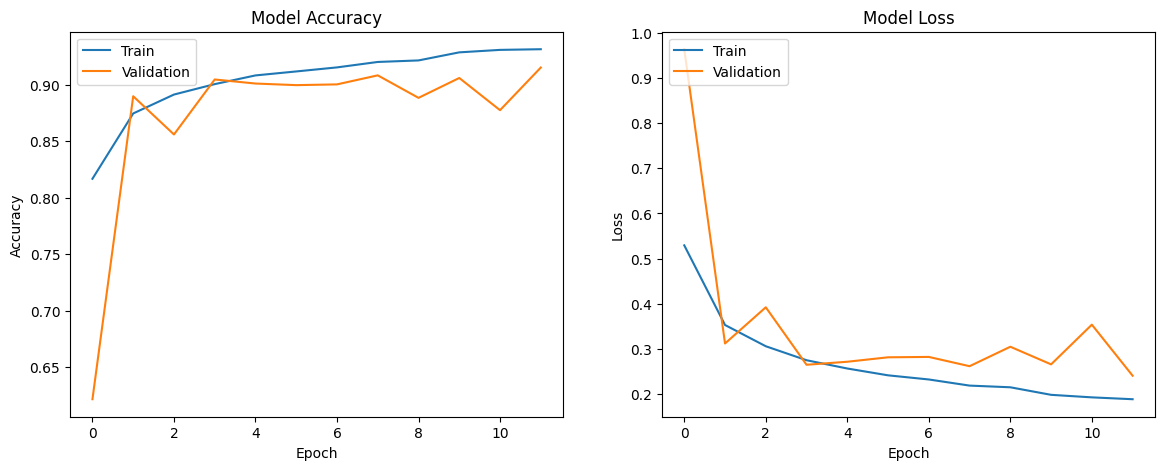

In [107]:
#plotting the model performance through the data training
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [108]:
test_loss, test_acc = Model1.evaluate(x_test, y_test, verbose = 2)
print(f"\n Test accuracy: { test_acc * 100 }% \n And the Test Loss: {test_loss*100}%")

313/313 - 1s - loss: 0.2646 - accuracy: 0.9093 - 652ms/epoch - 2ms/step

 Test accuracy: 90.93000292778015% 
 And the Test Loss: 26.46096646785736%


# **first architecture notices**
This model got ```Test accuracy: 90.93000292778015%``` using the ```Adam optimizer and 12 Epochs of training and validation``` droping the loss over the data in testing ```Test Loss: 26.46096646785736%```



---


># For the **second architecture** we will try

*   Another optimizer
*   A diffrent number of Epochs


In [114]:
EPOCHS=20
# second architecture

Model2 = tf.keras.Sequential([
    layers.Conv2D(32, (2, 2), activation='relu', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='relu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.2),
    layers.Flatten(),
    layers.Dense(NUM_CLASSES, activation='softmax')
])

# Compile the model
Model2.compile(optimizer='sgd',
               loss='categorical_crossentropy',  # Changed to 'categorical_crossentropy'
               metrics=['accuracy'])
Model2.summary()

Model: "sequential_19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_22 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_18 (Ba  (None, 27, 27, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_18 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_23 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 batch_normalization_19 (Ba  (None, 10, 10, 64)        256       
 tchNormalization)                                               
                                                     

In [115]:
history = Model2.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/20
375/375 [==============================] - 3s 7ms/step - loss: 0.6174 - accuracy: 0.7824 - val_loss: 0.8058 - val_accuracy: 0.7657
Epoch 2/20
375/375 [==============================] - 2s 6ms/step - loss: 0.4301 - accuracy: 0.8475 - val_loss: 0.3637 - val_accuracy: 0.8705
Epoch 3/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3786 - accuracy: 0.8669 - val_loss: 0.3282 - val_accuracy: 0.8838
Epoch 4/20
375/375 [==============================] - 3s 7ms/step - loss: 0.3487 - accuracy: 0.8760 - val_loss: 0.3156 - val_accuracy: 0.8882
Epoch 5/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3281 - accuracy: 0.8835 - val_loss: 0.3190 - val_accuracy: 0.8864
Epoch 6/20
375/375 [==============================] - 2s 6ms/step - loss: 0.3069 - accuracy: 0.8910 - val_loss: 0.3050 - val_accuracy: 0.8909
Epoch 7/20
375/375 [==============================] - 2s 6ms/step - loss: 0.2966 - accuracy: 0.8938 - val_loss: 0.2967 - val_accuracy: 0.8953
Epoch 

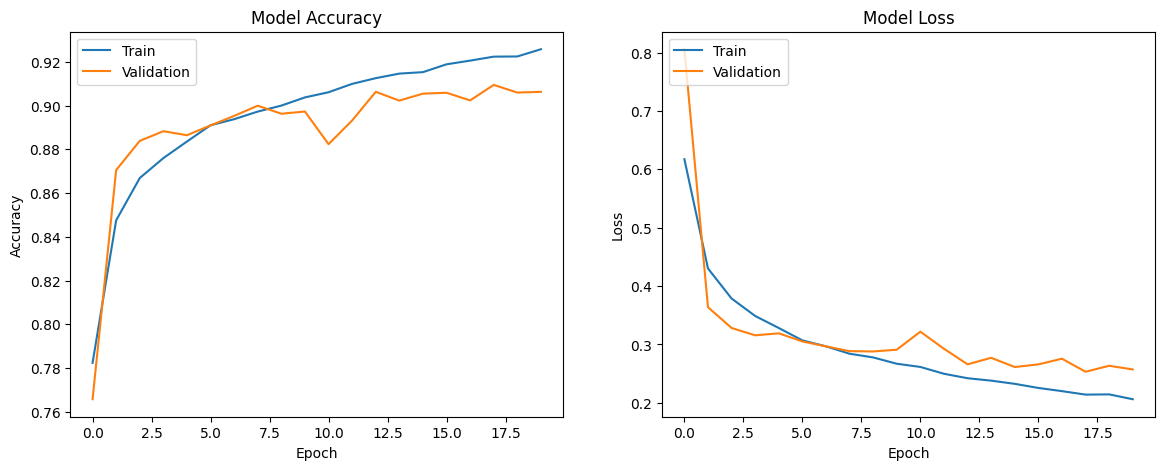

In [116]:
#plotting the model performance through the data training
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [117]:
test_loss, test_acc = Model2.evaluate(x_test, y_test, verbose = 2)
print(f"\n Test accuracy: { test_acc * 100 }% \n And the Test Loss: {test_loss*100}%")

313/313 - 1s - loss: 0.2745 - accuracy: 0.9042 - 645ms/epoch - 2ms/step

 Test accuracy: 90.420001745224% 
 And the Test Loss: 27.452760934829712%


# **second architecture notices**
This model got ```Test accuracy: 90.420001745224% ``` using the ```
Stochastic Gradient Descent (SGD) and 20 Epochs of training and validation``` droping the loss over the data in testing ```Test Loss: 27.452760934829712%```



---


># For the **third architecture** we will try

*   Another optimizer
*   Adding layers
*   Changing some parameters and activation functions
*   A diffrent number of Epochs


In [119]:
EPOCHS=30
# third architecture

Model3 = tf.keras.Sequential([
    layers.Conv2D(32, (2, 2), activation='elu', input_shape=(IMG_ROWS, IMG_COLS, 1)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (4, 4), activation='elu'),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),
    layers.Dropout(0.1),
    layers.Flatten(),
    layers.Dense(NUM_CLASSES, activation='sigmoid')
])

# Compile the model
Model3.compile(optimizer='adagrad',
               loss='categorical_crossentropy',  # Changed to 'categorical_crossentropy'
               metrics=['accuracy'])
Model3.summary()

Model: "sequential_21"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_27 (Conv2D)          (None, 27, 27, 32)        160       
                                                                 
 batch_normalization_23 (Ba  (None, 27, 27, 32)        128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_23 (MaxPooli  (None, 13, 13, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_28 (Conv2D)          (None, 10, 10, 64)        32832     
                                                                 
 batch_normalization_24 (Ba  (None, 10, 10, 64)        256       
 tchNormalization)                                               
                                                     

In [120]:
history = Model3.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/30
375/375 [==============================] - 5s 8ms/step - loss: 0.8090 - accuracy: 0.7261 - val_loss: 0.9527 - val_accuracy: 0.7061
Epoch 2/30
375/375 [==============================] - 3s 7ms/step - loss: 0.5732 - accuracy: 0.8013 - val_loss: 0.5074 - val_accuracy: 0.8265
Epoch 3/30
375/375 [==============================] - 3s 7ms/step - loss: 0.5119 - accuracy: 0.8245 - val_loss: 0.4610 - val_accuracy: 0.8401
Epoch 4/30
375/375 [==============================] - 3s 8ms/step - loss: 0.4744 - accuracy: 0.8376 - val_loss: 0.4341 - val_accuracy: 0.8490
Epoch 5/30
375/375 [==============================] - 3s 7ms/step - loss: 0.4495 - accuracy: 0.8458 - val_loss: 0.4186 - val_accuracy: 0.8534
Epoch 6/30
375/375 [==============================] - 3s 7ms/step - loss: 0.4319 - accuracy: 0.8514 - val_loss: 0.4028 - val_accuracy: 0.8584
Epoch 7/30
375/375 [==============================] - 3s 7ms/step - loss: 0.4139 - accuracy: 0.8571 - val_loss: 0.3912 - val_accuracy: 0.8632
Epoch 

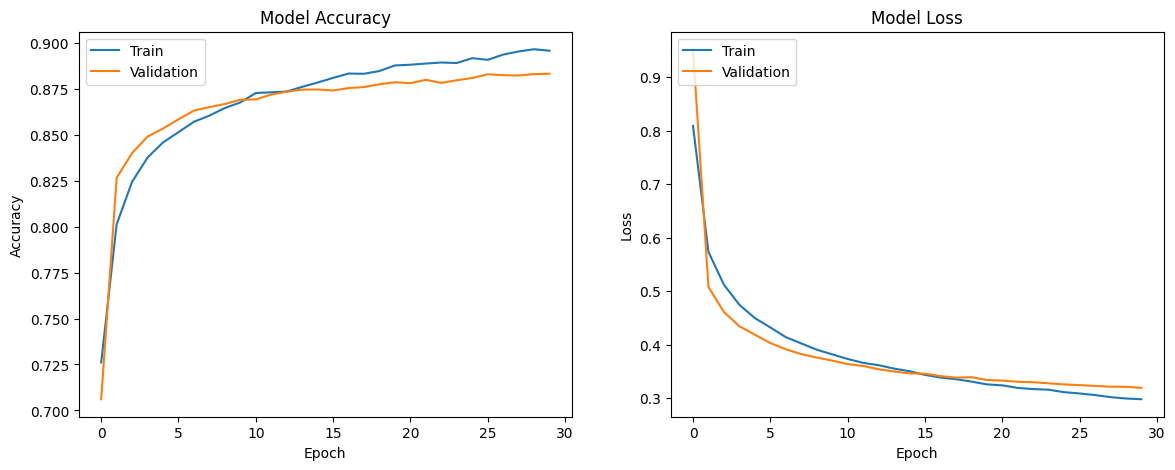

In [121]:
#plotting the model performance through the data training
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [122]:
test_loss, test_acc = Model3.evaluate(x_test, y_test, verbose = 2)
print(f"\n Test accuracy: { test_acc * 100 }% \n And the Test Loss: {test_loss*100}%")

313/313 - 1s - loss: 0.3399 - accuracy: 0.8805 - 975ms/epoch - 3ms/step

 Test accuracy: 88.05000185966492% 
 And the Test Loss: 33.98681581020355%


# **Third architecture notices**
This model got ```Test accuracy: 88.05000185966492% ``` using the ```
Adagrad (Adaptive Gradient Algorithm), changing the activation functions to elu and sigmoid and 30 Epochs of training and validation``` making the loss over the data in testing ```Test Loss: 33.98681581020355%```



---


># For the **Forth and final architecture** we will try

*   Another optimizer
*   Adding layers
*   Changing some parameters and activation functions
*   A diffrent number of Epochs


In [125]:
EPOCHS=25
# third architecture

Model4 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(IMG_ROWS, IMG_COLS,1)),
    tf.keras.layers.Dense(128),
    tf.keras.layers.LeakyReLU(alpha=0.1),
    tf.keras.layers.Dense(64),
    tf.keras.layers.Activation('tanh'),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
Model4.compile(optimizer='adamax',
               loss='categorical_crossentropy',  # Changed to 'categorical_crossentropy'
               metrics=['accuracy'])
Model4.summary()

Model: "sequential_24"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_14 (Flatten)        (None, 784)               0         
                                                                 
 dense_14 (Dense)            (None, 128)               100480    
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128)               0         
                                                                 
 dense_15 (Dense)            (None, 64)                8256      
                                                                 
 activation (Activation)     (None, 64)                0         
                                                                 
 dense_16 (Dense)            (None, 10)                650       
                                                                 
Total params: 109386 (427.29 KB)
Trainable params: 10

In [126]:
history = Model3.fit(
    x_train,
    y_train,
    batch_size=BATCH_SIZE,
    epochs=EPOCHS,
    validation_data=(x_val, y_val)
)

Epoch 1/25
375/375 [==============================] - 3s 8ms/step - loss: 0.2969 - accuracy: 0.8961 - val_loss: 0.3167 - val_accuracy: 0.8845
Epoch 2/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2928 - accuracy: 0.8980 - val_loss: 0.3173 - val_accuracy: 0.8848
Epoch 3/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2901 - accuracy: 0.8984 - val_loss: 0.3158 - val_accuracy: 0.8840
Epoch 4/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2884 - accuracy: 0.8990 - val_loss: 0.3165 - val_accuracy: 0.8843
Epoch 5/25
375/375 [==============================] - 3s 8ms/step - loss: 0.2865 - accuracy: 0.8992 - val_loss: 0.3124 - val_accuracy: 0.8858
Epoch 6/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2854 - accuracy: 0.9001 - val_loss: 0.3121 - val_accuracy: 0.8869
Epoch 7/25
375/375 [==============================] - 3s 7ms/step - loss: 0.2833 - accuracy: 0.9005 - val_loss: 0.3106 - val_accuracy: 0.8873
Epoch 

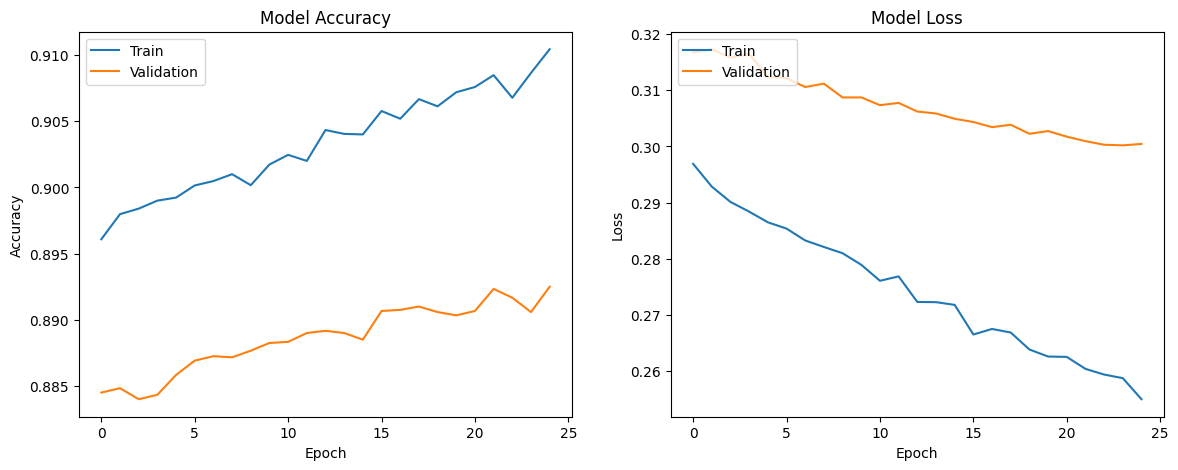

In [127]:
#plotting the model performance through the data training
plt.figure(figsize=(14, 5))

# Plot training accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()

In [128]:
test_loss, test_acc = Model3.evaluate(x_test, y_test, verbose = 2)
print(f"\n Test accuracy: { test_acc * 100 }% \n And the Test Loss: {test_loss*100}%")

313/313 - 1s - loss: 0.3200 - accuracy: 0.8871 - 848ms/epoch - 3ms/step

 Test accuracy: 88.70999813079834% 
 And the Test Loss: 31.996232271194458%


# **Fourth architecture notices**
This model got ```Test accuracy: 88.70999813079834% ``` using the ```
Adamax, changing the activation functions to LeakyRelu, tanh and softmax and 25 Epochs of training and validation``` making the loss over the data in testing ```Test Loss: 31.996232271194458%```

1/1 [==============================] - 0s 17ms/step


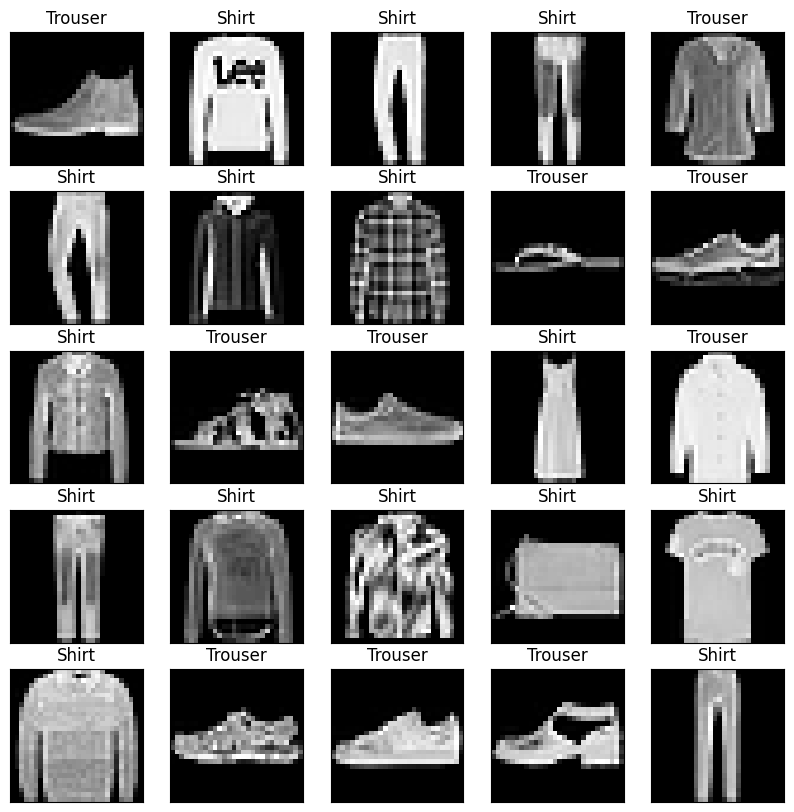

In [135]:
#then model two has the heighst accuracy so we use it to build the predict function

def predict(Model, X_test, class_names):
    sample_test = X_test[:25]
    plt.figure(figsize=(10, 10))
    for i in range(25):
        plt.subplot(5, 5, i + 1)
        plt.xticks([])
        plt.yticks([])
        plt.grid(False)
        plt.imshow(sample_test[i].reshape(IMG_ROWS, IMG_COLS), cmap=plt.cm.gray)
        prediction = Model.predict(sample_test[i].reshape(1, IMG_ROWS, IMG_COLS, 1)).argmax()  # Get the predicted class index
        plt.title(class_names[prediction])
    plt.show()

# Call the predict function
predict(Model2, x_test, class_names)
